<a href="https://colab.research.google.com/github/jmpantoja/colab/blob/main/Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
from tensorflow import keras
from matplotlib import pyplot as plt
from keras import Sequential
from keras.layers import Dense, Flatten

from keras.utils import to_categorical

In [71]:
fashion = keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion.load_data()

total_train = len(x_train)
total_test = len(x_test)

x_train = x_train / 255
x_test = x_test / 255


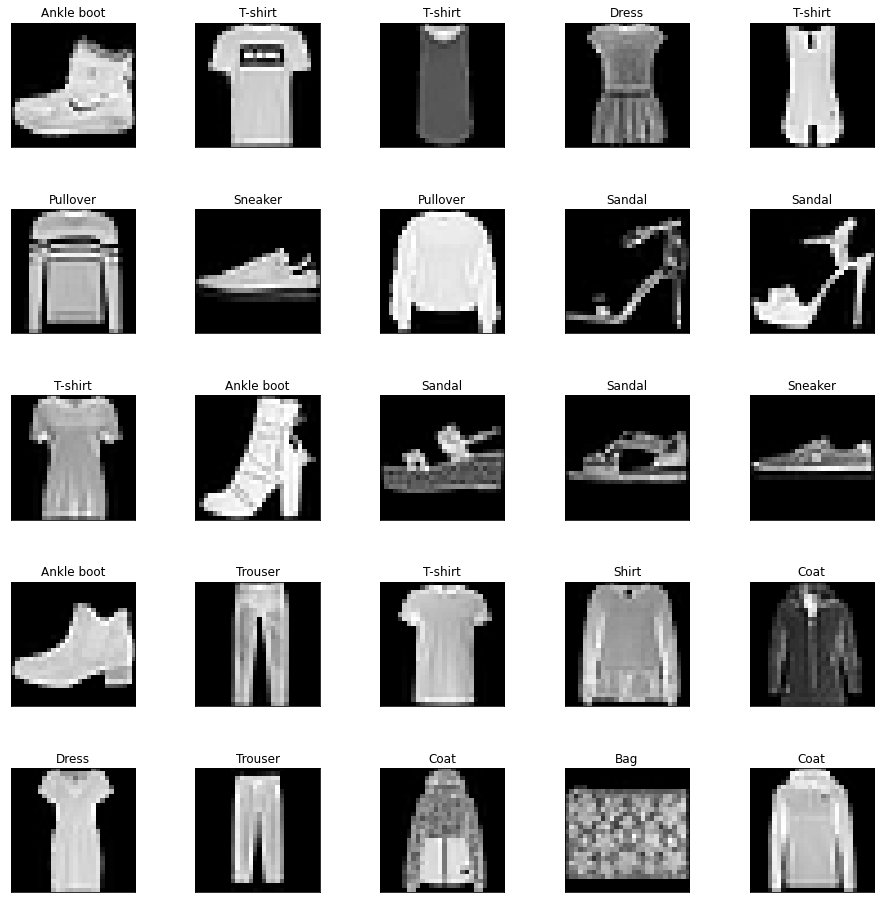

In [72]:
def label_name(label):
  class_names = [
      'T-shirt',
      'Trouser',
      'Pullover',
      'Dress',
      'Coat',
      'Sandal',
      'Shirt',
      'Sneaker',
      'Bag',
      'Ankle boot'
  ]

  return class_names[label]

plt.figure(figsize=(16, 16))

for i, image in enumerate(x_train[:25]):
  plt.subplot(5, 5, i+1)  
  plt.imshow(image, cmap='gray')
  plt.title(label_name(y_train[i]))


  plt.margins(5)
  plt.xticks([])
  plt.yticks([])
  plt.subplots_adjust(hspace=0.5)


plt.show()

In [73]:
print(x_train.shape)
print(x_test.shape)


model = Sequential([
  Flatten(input_shape=(28, 28)),
  Dense(10, activation="sigmoid", name='Input'),
  Dense(10, activation="softmax", name='Output')    
])

model.summary()

(60000, 28, 28)
(10000, 28, 28)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 Input (Dense)               (None, 10)                7850      
                                                                 
 Output (Dense)              (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [100]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

loss, acc = model.evaluate(x_test, y_test)
print(loss, acc)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.3689 - accuracy: 0.8676
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3657 - accuracy: 0.8687
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3629 - accuracy: 0.8703
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3601 - accuracy: 0.8715
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3573 - accuracy: 0.8710
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3557 - accuracy: 0.8716
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3531 - accuracy: 0.8746
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3507 - accuracy: 0.8738
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3493 - accuracy: 0.8740
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.4233 

1/1 [==============================] - 0s 51ms/step


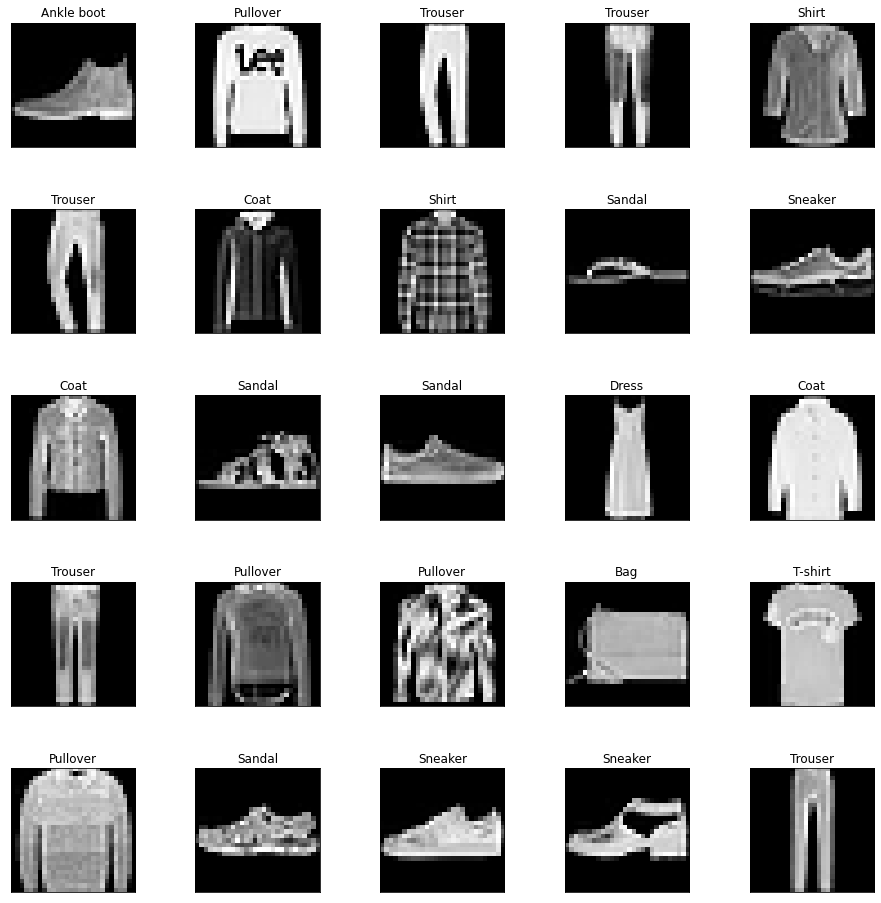

In [101]:
predictions = model.predict(x_test[:25])

plt.figure(figsize=(16, 16))

for i, prediction in enumerate(predictions):
  plt.subplot(5, 5, i+1)  
  plt.imshow(x_test[i], cmap='gray')
  
  label = prediction.argmax()
  plt.title(label_name(label))


  plt.margins(5)
  plt.xticks([])
  plt.yticks([])
  plt.subplots_adjust(hspace=0.5)


plt.show()

# print(predictions[0].argmax())
